# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | vicosa
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | rosetta
Processing Record 5 of Set 1 | voloshka
Processing Record 6 of Set 1 | faanui
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | san jeronimo
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | chicama
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | bontang
Processing Record 13 of Set 1 | spirit river
Processing Record 14 of Set 1 | santiago
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | kailua
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | beringovskiy
Processing Record 20 of Set 1 | aksarka
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | bilma
Processing Record 23 of Set 1 | longyearbye

Processing Record 35 of Set 4 | albany
Processing Record 36 of Set 4 | cowra
Processing Record 37 of Set 4 | tocache
Processing Record 38 of Set 4 | shahrud
Processing Record 39 of Set 4 | bukachacha
Processing Record 40 of Set 4 | kontagora
Processing Record 41 of Set 4 | martinsburg
Processing Record 42 of Set 4 | cap malheureux
Processing Record 43 of Set 4 | bijni
Processing Record 44 of Set 4 | bonavista
Processing Record 45 of Set 4 | yerbogachen
Processing Record 46 of Set 4 | budesti
Processing Record 47 of Set 4 | polunochnoye
Processing Record 48 of Set 4 | fuengirola
Processing Record 49 of Set 4 | yulara
Processing Record 0 of Set 5 | kieta
Processing Record 1 of Set 5 | cap-aux-meules
Processing Record 2 of Set 5 | fort saint john
City not found. Skipping...
Processing Record 3 of Set 5 | moose factory
Processing Record 4 of Set 5 | mahebourg
Processing Record 5 of Set 5 | ginda
Processing Record 6 of Set 5 | hami
Processing Record 7 of Set 5 | nokaneng
Processing Record 8

Processing Record 28 of Set 8 | san-pedro
Processing Record 29 of Set 8 | san clemente
Processing Record 30 of Set 8 | zhigansk
Processing Record 31 of Set 8 | mindelo
Processing Record 32 of Set 8 | alta floresta
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | maldonado
Processing Record 35 of Set 8 | tamandare
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | davila
Processing Record 38 of Set 8 | fortuna
Processing Record 39 of Set 8 | chakwal
Processing Record 40 of Set 8 | nemuro
Processing Record 41 of Set 8 | capreol
Processing Record 42 of Set 8 | sangar
Processing Record 43 of Set 8 | barawe
City not found. Skipping...
Processing Record 44 of Set 8 | beira
Processing Record 45 of Set 8 | sumbe
Processing Record 46 of Set 8 | sorland
Processing Record 47 of Set 8 | goderich
Processing Record 48 of Set 8 | ouesso
Processing Record 49 of Set 8 | sinazongwe
Processing Record 0 of Set 9 | aykhal
Processing Record 1 of Set 9 | n

Processing Record 16 of Set 12 | dekoa
City not found. Skipping...
Processing Record 17 of Set 12 | vestmanna
Processing Record 18 of Set 12 | wonthaggi
Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | hokitika
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | chamba
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | deogarh
Processing Record 26 of Set 12 | padang
Processing Record 27 of Set 12 | abha
Processing Record 28 of Set 12 | zharkent
Processing Record 29 of Set 12 | anchorage
Processing Record 30 of Set 12 | soledade
Processing Record 31 of Set 12 | otradnoye
Processing Record 32 of Set 12 | finschhafen
Processing Record 33 of Set 12 | grindavik
Processing Record 34 of Set 12 | mbanza-ngungu
Processing Record 35 of Set 12 | ferrol
Processing Record 36 of Set 12 | sao lourenco do sul
Processing Record 37 of Set 12 | druzhba
Processing Record 38 of Set 12 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.shape[0]

In [ ]:
# Display sample data
city_data_df.head()

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

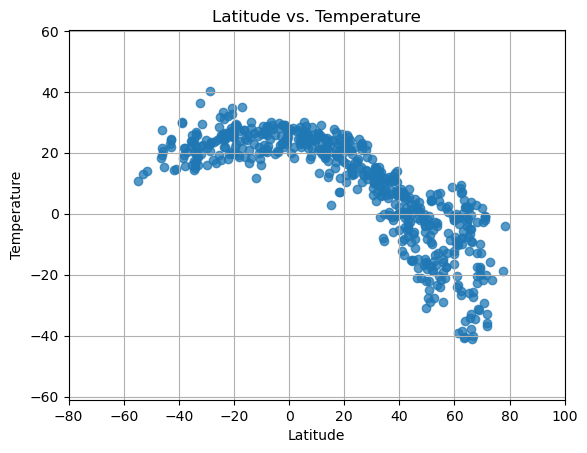

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Latitude vs. {'Temperature'}")
plt.xlabel('Latitude') 
plt.ylabel('Temperature')
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Max Temp'])-20,max(city_data_df['Max Temp'])+20)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

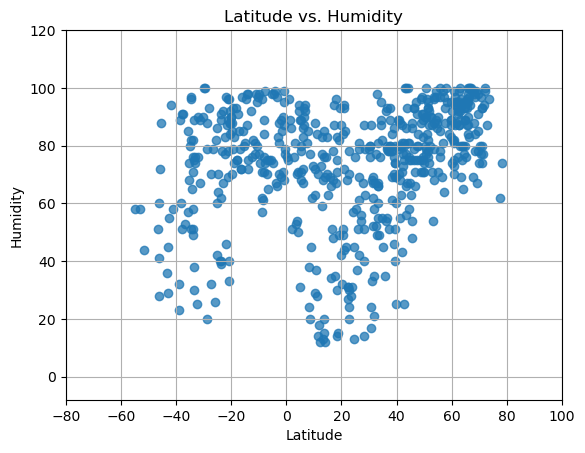

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Latitude vs. {'Humidity'}")
plt.xlabel('Latitude') 
plt.ylabel('Humidity')
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Humidity'])-20,max(city_data_df['Humidity'])+20)
plt.grid()



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

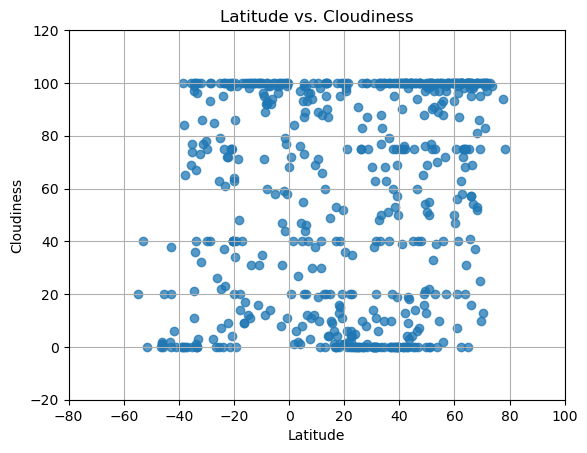

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Latitude vs. {'Cloudiness'}")
plt.xlabel('Latitude') 
plt.ylabel('Cloudiness')
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Cloudiness'])-20,max(city_data_df['Cloudiness'])+20)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

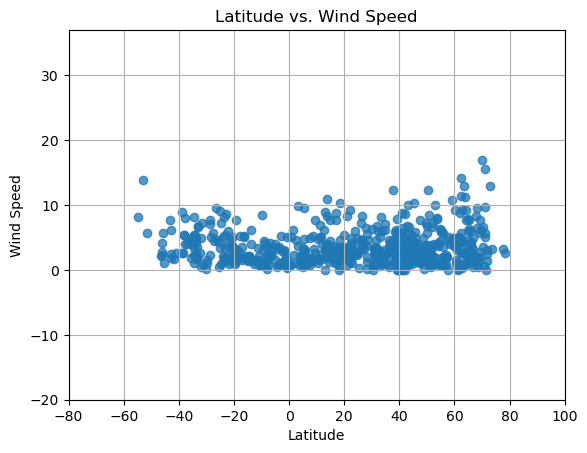

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha=0.75)

# Incorporate the other graph properties
plt.title(f"Latitude vs. {'Wind Speed'}")
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.xlim(-80,100)
plt.ylim(min(city_data_df['Wind Speed'])-20,max(city_data_df['Wind Speed'])+20)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def regression_plot(x_value,y_value):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_value,y_value)
    plt.plot(x_value,regress_value,"r-")
    plt.annotate(line_eq,(x_value.median(),y_value.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.show()

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rosetta,31.4044,30.4164,15.01,69,0,3.31,EG,1674962954
4,voloshka,61.3314,40.0858,-10.09,94,100,4.41,RU,1674962955
8,nanortalik,60.1432,-45.2371,-7.77,74,47,9.30,GL,1674962956
11,bontang,0.1333,117.5000,27.79,76,68,0.77,ID,1674962957
12,spirit river,55.7833,-118.8361,-15.78,78,2,5.64,CA,1674962957


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,19.65,58,0,4.92,ZA,1674962952
1,vicosa,-20.7539,-42.8819,19.76,96,100,1.99,BR,1674962953
2,luderitz,-26.6481,15.1594,16.77,79,0,9.60,NaN,1674962954
5,faanui,-16.4833,-151.7500,27.49,72,9,5.19,PF,1674962955
6,hobart,-42.8794,147.3294,24.47,45,20,6.17,AU,1674962899


###  Temperature vs. Latitude Linear Regression Plot

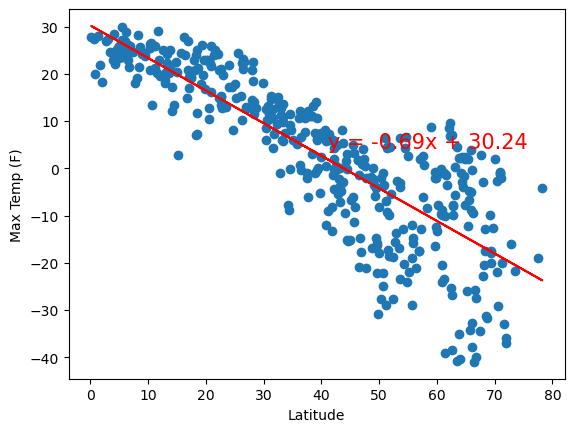

None


In [43]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.ylabel("Max Temp (F)")
print(regression_plot(x_values,y_values))

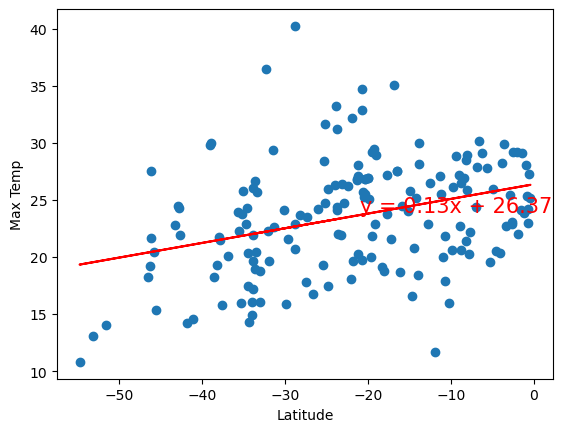

None


In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.ylabel("Max Temp")
print(regression_plot(x_values,y_values))

In [ ]:
**Discussion about the linear relationship:**There is a negative linear relationship between max temp and latittude when looking at the 
    Northern Hemisphere plot. When we look at cities that are closer to the north pole and farther from the equator, temperatures drop.
    With the Southern Hemisphere plot, we see a positve correlation between max temp and latitutde. The closer you get to the equator, there
    is a rise in temp.

### Humidity vs. Latitude Linear Regression Plot

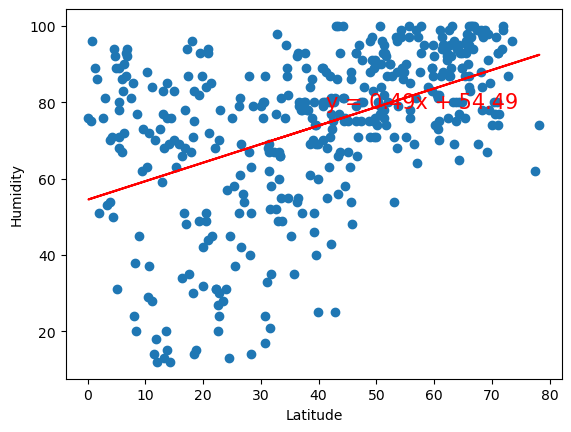

None


In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(regression_plot(x_values,y_values))

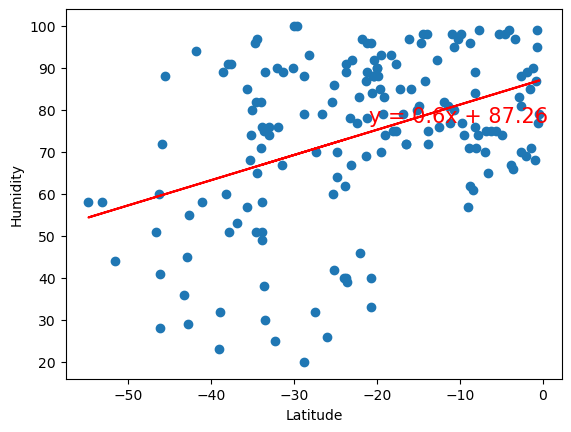

None


In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.ylabel("Humidity")
print(regression_plot(x_values,y_values))

**Discussion about the linear relationship:** The Northern Hemisphere plot shows us that the further away from the equator you are, the humidity increases.The Southern Hemisphere plot showss the closer you are to the equator, the higher the humidity is.

### Cloudiness vs. Latitude Linear Regression Plot

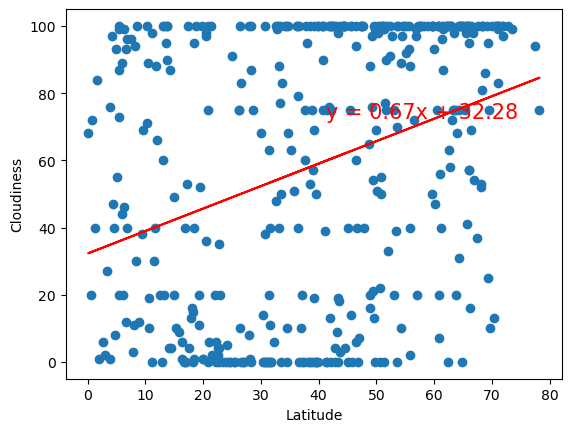

None


In [39]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(regression_plot(x_values,y_values))

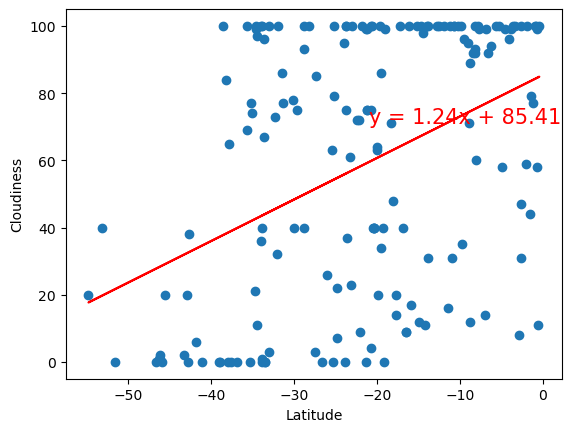

None


In [40]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.ylabel("Cloudiness")
print(regression_plot(x_values,y_values))

**Discussion about the linear relationship:** The Northern Hemisphere plot shows a very slight positve correlation between cloudiness and latitude. In the Southern Hemisphere, it shows the closer you are to the equator, the more cloudy it is.

### Wind Speed vs. Latitude Linear Regression Plot

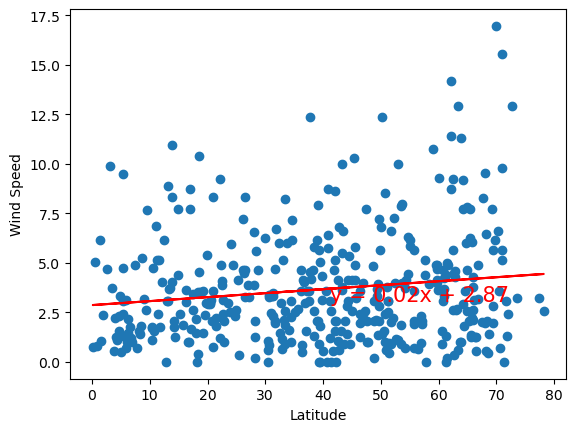

None


In [41]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(regression_plot(x_values,y_values))

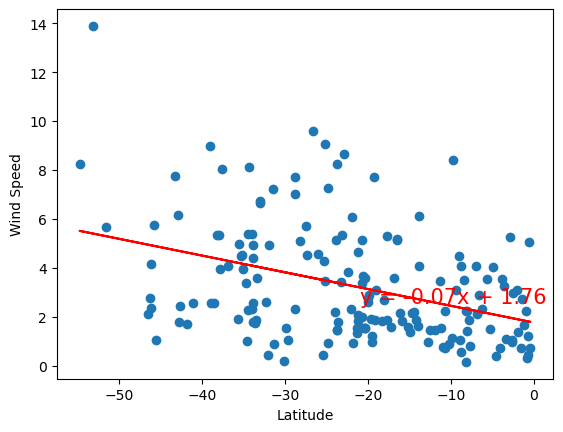

None


In [42]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.ylabel("Wind Speed")
print(regression_plot(x_values,y_values))

**Discussion about the linear relationship:** The Northern Hemisphere plot shows a pretty strong correlation between wind speed and latitude when you look at the plots. The Southern Hemisphere plot shows a negative linear relationship.